## Words Scraping & Analysis

This analysis searches through pubmed for papers that mention specific ERPs. It then scrapes the titles, words, and years of all those papers such that this data can be used for further analysis. 

Here:
- Words analysis: scrapes for ERP papers, pulls out words in abstracts for analysis. 

In [1]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
%autoreload 2
# Import ERPSC Code for Word Analysis
from erpsc.words import Words
from erpsc.erp_data_all import ERPDataAll
from erpsc.core.io import save_pickle_obj, load_pickle_obj

In [ ]:
# Initialize words-analysis object
words = Words()

In [ ]:
# Add list of ERPs from file, and list of exclusion words
words.set_erps_file()
words.set_exclusions_file()

In [ ]:
# OR: Set small set of ERPs and terms for tests

# Initialize test set of erp terms
erps = [['P100'], ['P300']]
exc = [['protein', 'q21'], ['cancer', 'histone', 'cell']]

#erps = [['P300']]
#exc = [['cancer', 'histone', 'cell']]

# Set ERP terms
words.set_erps(erps)
words.set_exclusions(exc)

In [ ]:
# Scrape word data for all ERP abstracts
words.scrape_data(db='pubmed', retmax='5')

In [ ]:
# Save pickle of word object
save_pickle_obj(words, 'test')

In [3]:
# Load word pickle object
words = load_pickle_obj('BaseScrape_words')

## ERP Words Analysis

In [4]:
# Check database scrape info
words.db_info

{'count': '27005083',
 'dbbuild': 'Build170315-2207m.6',
 'dbname': 'pubmed',
 'description': 'PubMed bibliographic record',
 'lastupdate': '2017/03/16 11:30',
 'menuname': 'PubMed'}

In [5]:
# Check requester object info
words.req.check()

Requester object is active: 	 False
Number of requests sent: 	 13
Requester opened: 		 09:48 Thursday 16 March
Requester closed: 		 09:59 Thursday 16 March
Most recent request sent at: 	 1489683464.649618


In [6]:
# Collect ERPs into list of aggragated data objects
all_dat = [ERPDataAll(words[erp]) for erp in words.keys]

In [7]:
# Check most common words
for erp in all_dat:
    erp.check_words(8)

P100 :  visual , patients , processing , study , amplitude , evoked , potentials , faces , 
P300 :  study , patients , processing , task , results , brain , stimuli , auditory , 
N170 :  faces , processing , face , visual , early , facial , stimuli , emotional , 
P600 :  processing , syntactic , semantic , sentences , n400 , erp , effect , language , 
N400 :  semantic , processing , words , effect , word , erp , effects , results , 
MMN :  auditory , processing , mismatch , negativity , patients , stimuli , study , response , 


In [8]:
# Check most common keywords
for erp in all_dat:
    erp.check_kws(6)

P100 :  P100 , Visual evoked potentials , ERP , N170 , Attention , Event-related potentials , 
P300 :  P300 , EEG , Event-related potentials , event-related potentials , ERP , Attention , 
N170 :  N170 , ERP , Event-related potentials , face processing , Emotion , Face perception , 
P600 :  P600 , N400 , ERP , ERPs , Event-related potentials , Language , 
N400 :  N400 , ERPs , ERP , Event-related potentials , P600 , Language , 
MMN :  MMN , Mismatch negativity , Mismatch negativity (MMN) , mismatch negativity , EEG , Schizophrenia , 


## WordCloud Plots

In [9]:
from erpsc.plts.wc import make_wc

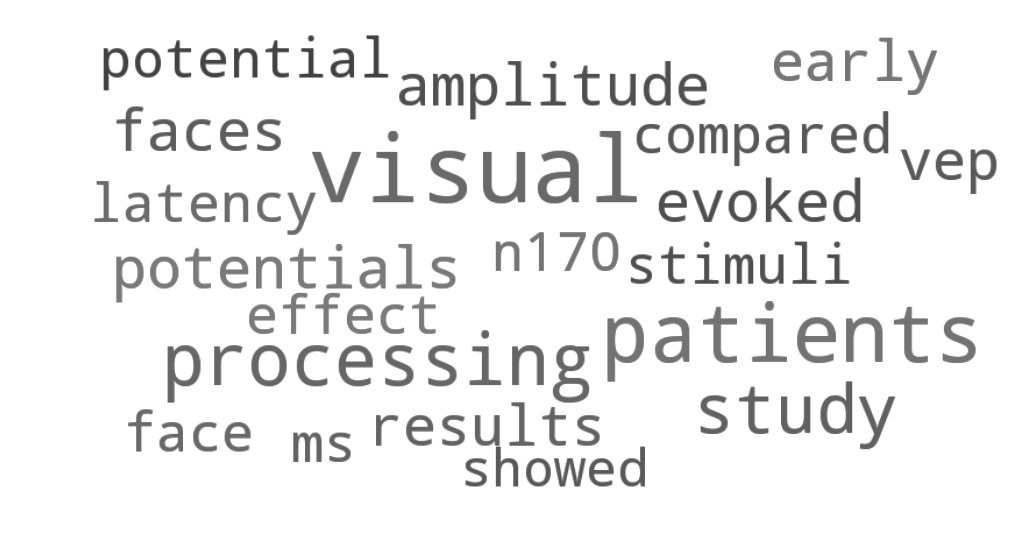

In [10]:
# Create a wordcloud
make_wc(all_dat[0].word_freqs, 20, save_fig=False)

## Data Plots

In [11]:
from erpsc.plts.dat import *

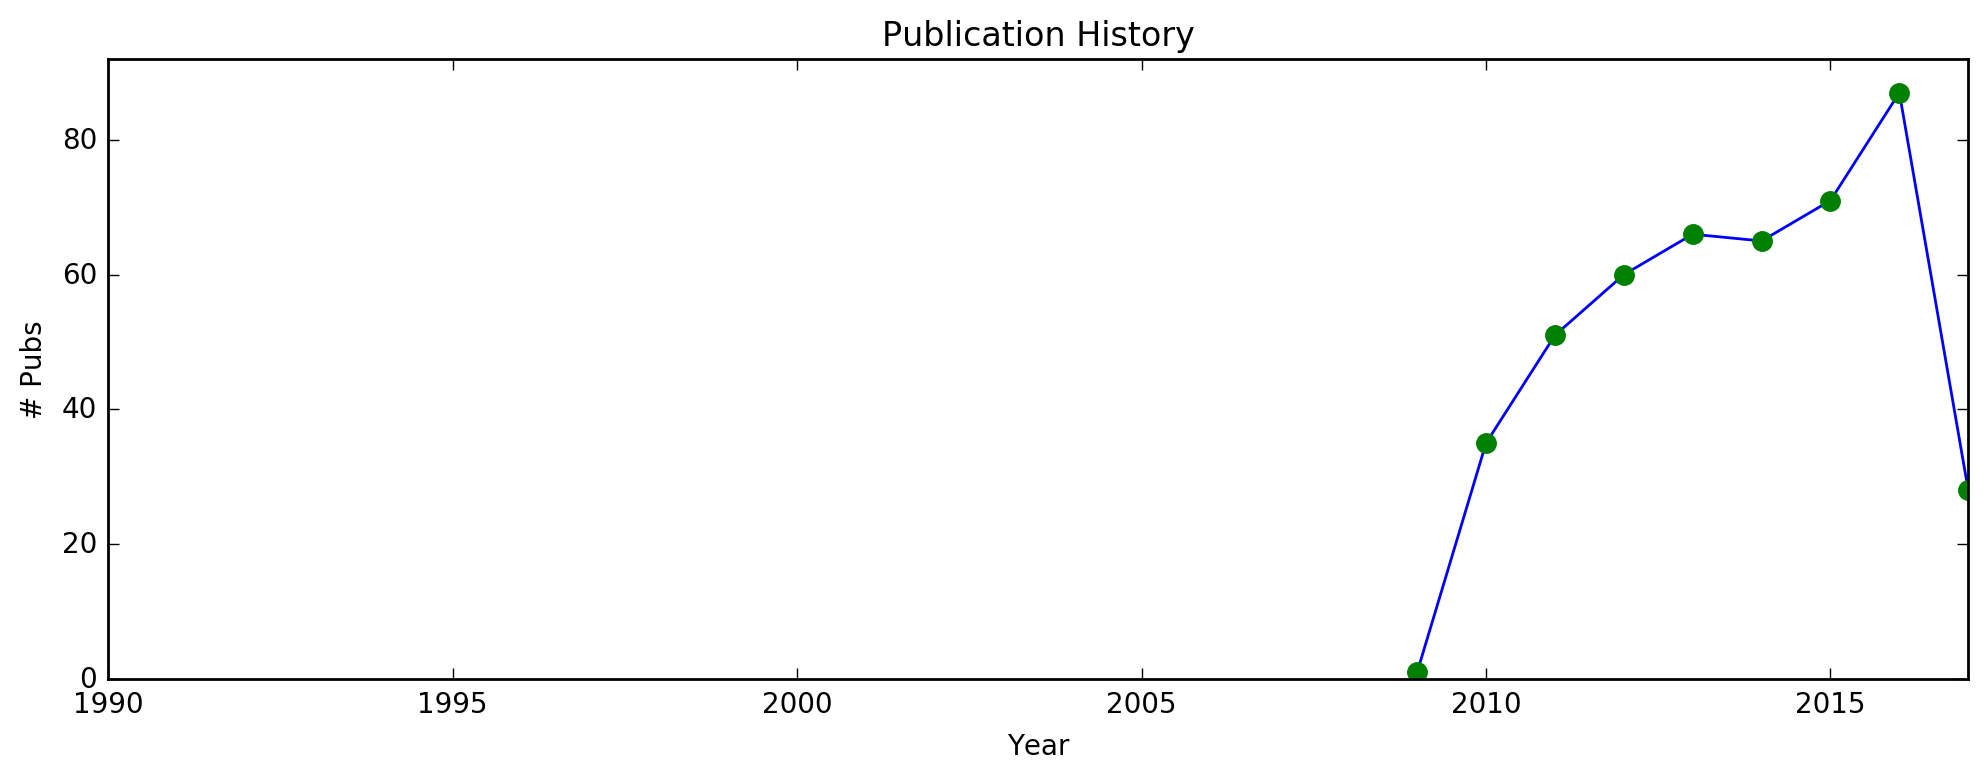

In [12]:
plot_years(all_dat[0].year_counts)